<a href="https://colab.research.google.com/github/GadnerBV/Bootcamp_Data_Science_Alura/blob/main/M%C3%B3dulo_1_Bootcamp_Datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Caderno de exploração dos dados do Datasus 2008 para frente

In [5]:
import pandas as pd

In [6]:
dados = pd.read_csv("/content/drive/MyDrive/Python/Bootcamp/A233913189_28_143_208.csv", encoding="ISO-8859-1",
                    skiprows = 3, sep= ";", skipfooter= 12,
                    thousands =".", decimal=",")
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9308601.23,11954489.94,11887993.85,10328280.19,8068024.57,9486450.48,9012840.42,9855249.57,9770992.43,14740022.40,15347858.07,16236293.19,15143679.18,12498710.53,10951319.46,1.073782e+09
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,6307616.67,6354514.15,3461663.11,4979239.30,4138751.64,4.752903e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13540590.64,19703025.18,21134874.24,19769752.76,18069587.18,17852221.73,16419160.70,19903821.77,17794528.56,21621697.26,26103808.87,23445832.76,23154039.32,26127701.15,26398054.09,24446286.12,21752718.52,2.041004e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,3020718.84,2860584.22,2740088.01,2689103.41,2985029.23,2771881.20,2938769.32,2527888.58,2587642.41,1923440.17,2422446.17,24954

In [7]:
dados.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,53699506.08,58730379.58,57629317.06,58779088.02,63366430.89,62200230.97,61683824.68,62495363.90,64614271.83,66457445.34,66425009.36,65782428.73,63714541.87,64488493.88,66304168.50,61527419.52,62490522.38,66814413.40,67900518.35,64799726.75,68518232.07,68731297.03,66174969.16,66891309.48,67456434.73,67096302.52,60754144.32,58884339.85,66205364.40,...,90754504.49,89093690.14,94010888.97,93664724.68,90025945.36,93081292.31,89050712.34,89664703.23,89259306.50,85585754.75,95152786.47,94163838.23,92237333.46,1.022983e+08,1.002601e+08,95917106.56,1.023316e+08,93971904.79,90775418.13,94908336.74,91437940.91,1.028761e+08,83000318.02,82381774.95,86092502.24,1.005793e+08,1.026100e+08,1.044010e+08,1.174583e+08,1.088539e+08,1.117605e+08,1.200098e+08,1.119016e+08,1.343308e+08,1.445253e+08,1.473374e+08,1.515765e+08,1.534800e+08,137579124.29,1.350319e+10
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,9547923.55,9450010.19,8365709.79,10033643.71,10746263.10,10849523.03,10902848.13,11991649.26,12050259.66,12174950.98,11178470.01,11997775.92,11686533.15,10756188.43,10565385.71,12148432.58,11270972.80,11947693.50,11435565.54,12392541.52,12441459.98,12025317.84,12353546.78,12381792.58,12340247.31,12467693.91,12356930.32,11209008.55,9656677.02,13698836.79,...,17357780.20,17090876.79,16468255.95,17395858.50,16259261.13,16390075.24,15350893.92,17108719.02,17713810.57,16882690.96,18253870.27,17778458.45,18387822.48,1.987093e+07,1.891386e+07,19591383.84,1.893544e+07,17230688.81,17895244.76,18115134.64,19542439.88,1.903279e+07,17410262.53,17913161.92,17363192.43,1.885884e+07,1.987708e+07,1.924789e+07,1.949721e+07,2.202313e+07,1.979587e+07,2.197742e+07,2.531665e+07,2.609724e+07,2.695567e+07,2.888897e+07,3.434338e+07,3.167354e+07,36433854.87,2.485179e+09
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,9677093.95,7150345.50,10421826.32,9939399.66,9332546.32,11965500.15,11185014.96,12058150.55,11635436.04,11698836.48,11823239.61,10810420.65,12130636.06,11574096.75,10726251.53,12364760.67,11382133.07,11947040.32,12233217.84,12656421.09,11263407.74,12795267.96,12805173.87,12171713.91,11961452.83,11777799.00,11142684.27,11709080.86,11149107.81,12381255.67,...,15883977.51,17163673.03,15569285.17,15630276.46,15838064.68,14815961.13,13853034.99,14229113.36,15288698.79,16045499.92,15890208.95,16092716.67,16699780.69,1.631481e+07,1.676358e+07,15608982.84,1.585564e+07,15823328.54,15032737.51,15259436.50,15066106.66,1.490697e+07,12563655.61,13632848.78,13215428.53,1.683465e+07,1.970622e+07,2.074722e+07,2.272811e+07,2.069369e+07,1.997729e+07,1.948038e+07,1.906485e+07,2.428373e+07,3.093521e+07,3.178601e+07,3.295717e+07,3.803978e+07,36567362.69,2.356738e+09
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,20621423.04,17094580.10,21615561.61,20678552.05,23043942.78,23334312.45,23508108.16,23947606.91,24369848.15,24577126.64,24372626.65,25227845.74,24746686.90,24628958.50,25524615.37,23352380.2

In [8]:
dados.mean()

2008/Jan    1.512685e+07
2008/Fev    2.271016e+07
2008/Mar    2.459419e+07
2008/Abr    2.543196e+07
2008/Mai    2.651125e+07
                ...     
2021/Abr    7.255846e+07
2021/Mai    7.678135e+07
2021/Jun    8.003890e+07
2021/Jul    7.889588e+07
Total       6.774439e+09
Length: 163, dtype: float64

In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 166 entries, Unidade da Federação to Total
dtypes: float64(163), object(3)
memory usage: 35.1+ KB


In [10]:
pd.options.display.float_format = "{:.2f}".format

In [11]:
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2021/Abr     72558458.73
2021/Mai     76781349.18
2021/Jun     80038897.67
2021/Jul     78895881.06
Total      6774438510.94
Length: 163, dtype: float64

In [12]:
dados["2008/Jan"]

0     1388528.39
1      902416.00
2     4735529.42
3      657889.53
4    18864744.11
5     1120973.34
6     3441592.69
7    10723506.39
8     7985142.43
9    15539821.90
10    5947814.08
11   10723002.45
12   14393949.89
13    6243726.32
14    2780750.11
15   21211522.47
16   45671659.76
17    5456723.98
18   23025258.52
19   91678473.48
20   38266347.46
21   16504913.45
22   30931325.46
23    5377392.11
24    4795299.01
25   15310637.29
26    4745919.19
Name: 2008/Jan, dtype: float64

In [13]:
dados["2008/Jan"].mean()

15126846.638148146

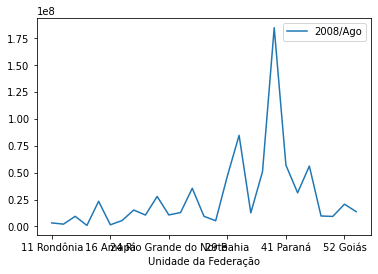

In [15]:
dados.plot(x="Unidade da Federação", y="2008/Ago")

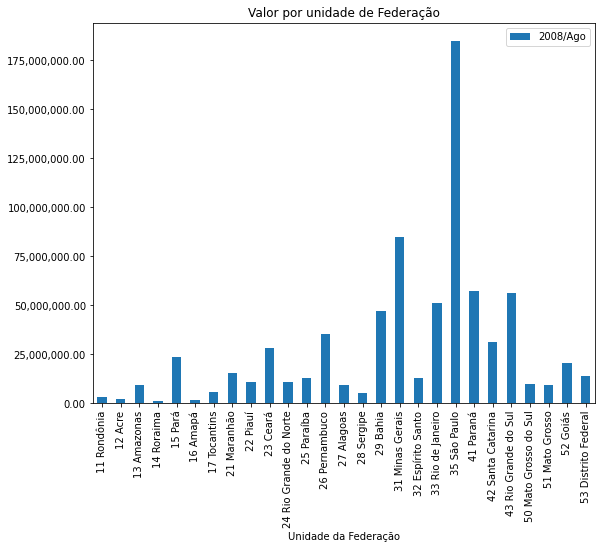

In [30]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", figsize=(9,7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valor por unidade de Federação")
plt.show()

Desafio de escolher um título mais descritivo.

Fazer a mesma análise para o mês mais recente da base de dados.

In [31]:
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9308601.23,11954489.94,11887993.85,10328280.19,8068024.57,9486450.48,9012840.42,9855249.57,9770992.43,14740022.40,15347858.07,16236293.19,15143679.18,12498710.53,10951319.46,1073782138.81
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,6307616.67,6354514.15,3461663.11,4979239.30,4138751.64,475290315.34
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13540590.64,19703025.18,21134874.24,19769752.76,18069587.18,17852221.73,16419160.70,19903821.77,17794528.56,21621697.26,26103808.87,23445832.76,23154039.32,26127701.15,26398054.09,24446286.12,21752718.52,2041003727.86
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,3020718.84,2860584.22,2740088.01,2689103.41,2985029.23,2771881.20,2938769.32,2527888.58,2587642.41,1923440.17,2422446.17,249

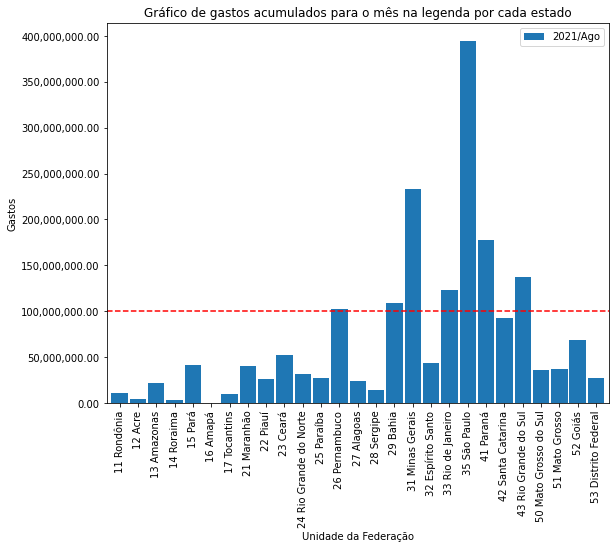

In [74]:
#Mês mais recente é 2021/Ago.
#Primeiro ajustando o gráfico com o mês de Jul, pois este não precisa ser tratado.

dados.replace(to_replace='-', value=0.00, inplace=True)
dados['2021/Ago'] = pd.to_numeric(dados['2021/Ago'])

ax = dados.plot(x="Unidade da Federação", y="2021/Ago", kind='bar',figsize=(9,7), width=(0.9))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.axhline(y=100000000.00, color='r', linestyle='--')
plt.title("Gráfico de gastos acumulados para o mês na legenda por cada estado")
plt.ylabel("Gastos")

plt.show()

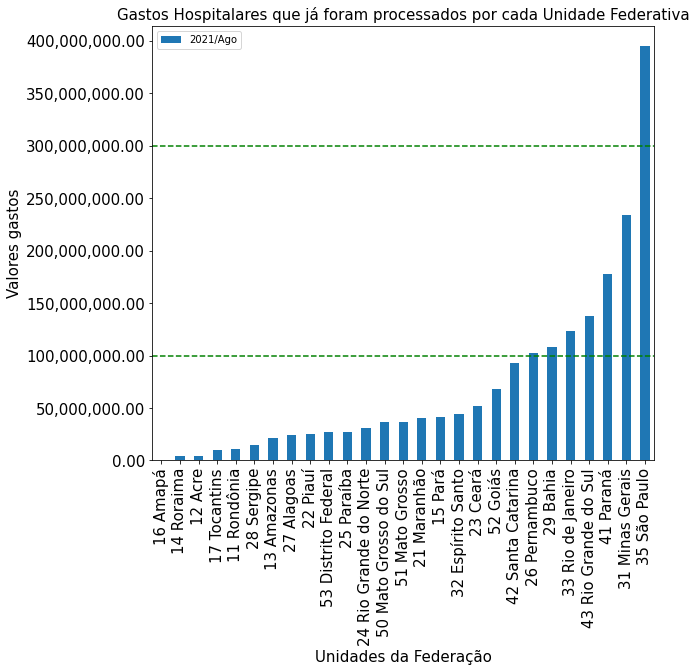

In [76]:
#Testando outra maneira de plotar

dados_ordenado = dados.sort_values('2021/Ago')

dados_ordenado['2021/Ago']
ax = dados_ordenado.plot(x="Unidade da Federação", y="2021/Ago", kind= 'bar', figsize=(9,8), fontsize=15)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.axhline(y=100000000.00, color='g', linestyle='--')
plt.axhline(y=300000000.00, color='g', linestyle='--')
plt.title("Gastos Hospitalares que já foram processados por cada Unidade Federativa", fontsize=15)
plt.ylabel("Valores gastos", fontsize=15)
plt.xlabel("Unidades da Federação", fontsize=15)

plt.show()